<font color=gray size=6>
   金默默+2022103797+期末作业

In [41]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

<font color=gray size=4>
   一、数据处理

In [37]:
#定义数据预处理的类
class dataProcessing:
    def __init__(self,data):
        self.data=data
    def Missing(self):
        try:
            if (data.isnull().sum().sum()==0):
                print("数据没有缺失值。")
            else:
                raise Exception('Missingdata')
        except:
            print("请先处理缺失值！")
    def Standard(self,i):
        x = data.iloc[:,i]
        meanx = np.mean(x)
        stdx = np.std(x)
        y = (x-meanx)/stdx
        return y

In [42]:
#导入牛奶数据
data = pd.read_csv("D:/用户目录/Administrator/Desktop/编程基础/final/milk/milknew.csv")
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [44]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [45]:
#创建类dataProcessing的对象dP,data为给定数据集
dP = dataProcessing(data)

In [46]:
#判断是否存在缺失值
dP.Missing()

数据没有缺失值。


In [47]:
#查看数据类型
data.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

<font color=gray size=4>
   二、数据可视化

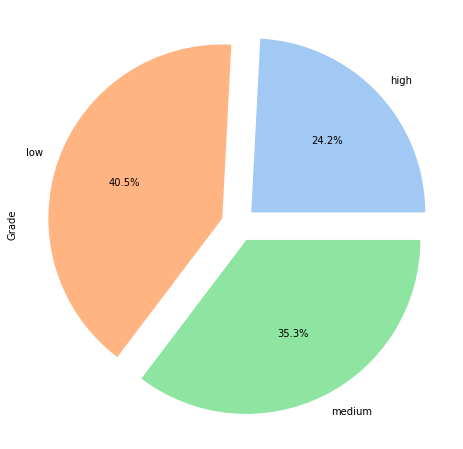

In [48]:
#对牛奶品质做可视化
plt.figure(figsize=(8,8))
palette_color = sns.color_palette('pastel')
explode = [0.1, 0.1, 0.1]
data.groupby('Grade')['Grade'].count().plot.pie(colors=palette_color,explode=explode, autopct="%1.1f%%");

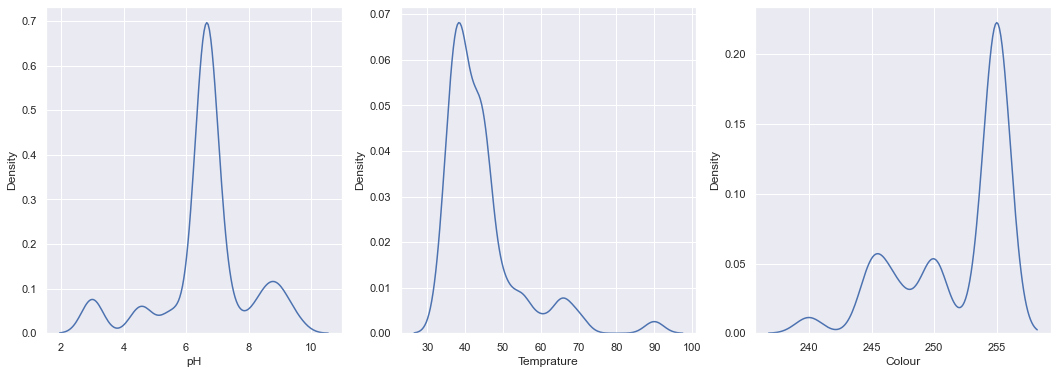

In [119]:
#连续型变量密度图
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.set_style('darkgrid' ) 
for var, subplot in zip(['pH', 'Temprature', 'Colour'], ax.flatten()):
    sns.kdeplot(x= var, data=data, ax=subplot)

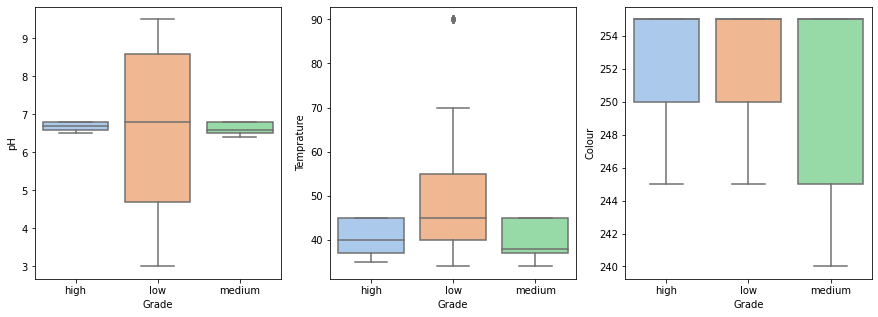

In [57]:
#观察不同ph、温度和颜色对牛奶品质的影响
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
var = ['pH','Temprature','Colour']
for i in range(3):
    sns.boxplot(x='Grade', y=var[i], data=data, ax=list(ax.flatten())[i], palette=sns.color_palette("pastel", 3))

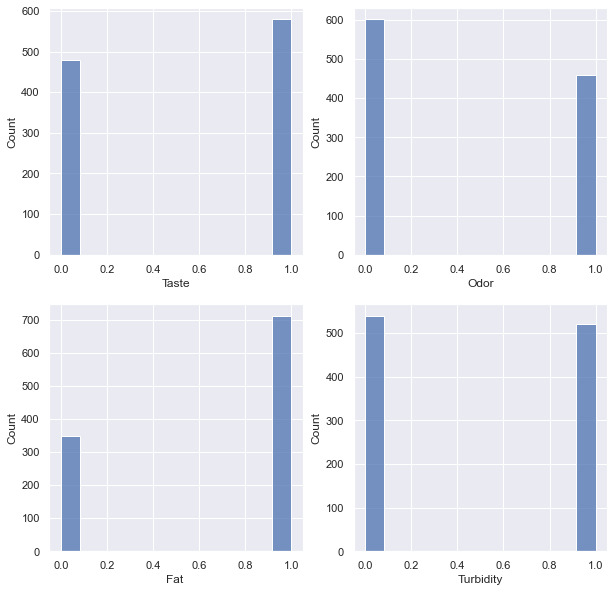

In [123]:
#二分类变量柱状图
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for var, subplot in zip(['Taste', 'Odor', 'Fat ', 'Turbidity'], ax.flatten()):
    sns.histplot(data=data[var],ax=subplot)

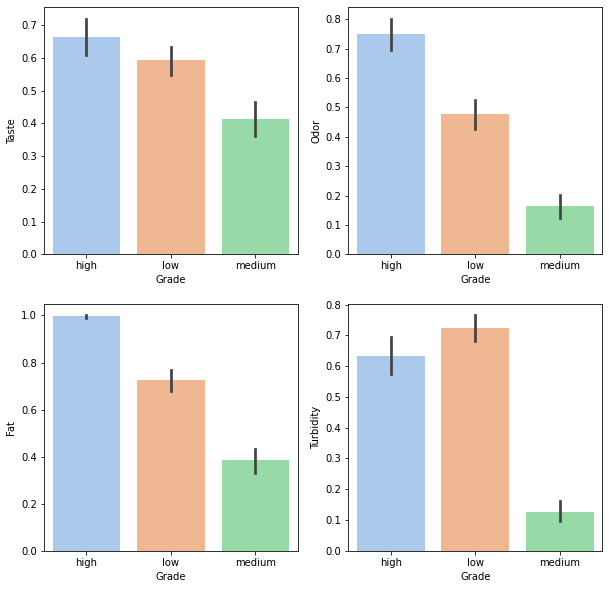

In [69]:
#二分类变量和牛奶品质
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for var, subplot in zip(['Taste', 'Odor', 'Fat ', 'Turbidity'], ax.flatten()):
    sns.barplot(x='Grade', y= var, data=data, ax=subplot, palette=sns.color_palette("pastel", 3))

<AxesSubplot:>

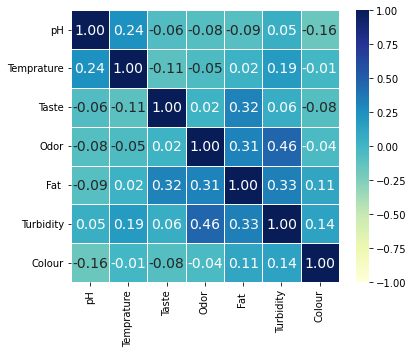

In [74]:
#相关性热图
f, axes = plt.subplots(1, 1, figsize=(6, 5))
sns.heatmap(data.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "YlGnBu")

<font color=gray size=4>
   三、建模

<font color=gray size=3>
   (一)、Logistic Regression

In [75]:
#将牛奶品质相应替换为数字0，1，2
data=data.replace({'low': 0, 'medium': 1, 'high': 2,})
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [76]:
#标准化数据
ph2 = dP.Standard(0)
Temprature2 = dP.Standard(1)
Colour2 = dP.Standard(6)
data2 = data.copy()
data2['pH'] = ph2
data2['Temprature'] = Temprature2
data2['Colour'] = Colour2
data2.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,-0.021531,-0.914107,1,0,1,0,0.501600,2
1,-0.021531,-0.815035,0,1,0,1,0.269333,2
2,1.336564,2.553438,1,1,1,1,-1.356536,0
3,2.051351,-1.013180,1,1,0,1,0.733867,0
4,-0.021531,-0.715962,0,0,0,0,0.733867,1


In [77]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.metrics import confusion_matrix #for confusion matrix 
from sklearn.metrics import plot_confusion_matrix

In [78]:
#分离训练集和测试集
x= data2.drop(['Grade'],axis=1)
y= data2['Grade']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (741, 7)
X Test  :  (318, 7)
Y Train :  (741,)
Y Test  :  (318,)


In [105]:
#from sklearn.model_selection import GridSearchCV  # 网格搜索
p = {
    'C':list(np.linspace(0.05,1,19)),
    'solver':['liblinear','sag','newton-cg','lbfgs']}

model = LogisticRegression()
GS = GridSearchCV(model,p,cv=5,scoring='accuracy')
GS.fit(X_train,y_train)
#输出最优参数
GS.best_params_

{'C': 0.8416666666666667, 'solver': 'sag'}

In [100]:
#选择最佳参数进行模型拟合
LR_model = LogisticRegression(C=0.84,solver='sag')
LR_model.fit(X_train,y_train)
#训练集拟合效果
train_accuracy = round(LR_model.score(X_train, y_train)*100,2)
print("Training Accuracy: % {}".format(train_accuracy))

Training Accuracy: % 85.29


d:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


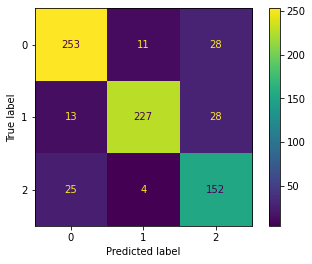

In [101]:
plot_confusion_matrix(LR_model, X_train, y_train )  
plt.show()

In [103]:
#测试集预测效果
test_accuracy = round(LR_model.score(X_test, y_test)*100,2)
print("Testing Accuracy: % {}".format(test_accuracy))

Testing Accuracy: % 85.53


d:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


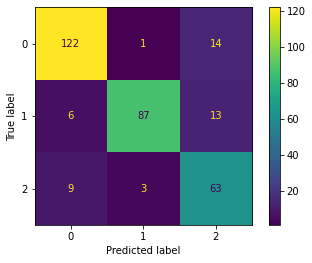

In [104]:
plot_confusion_matrix(LR_model, X_test, y_test )  
plt.show()

<font color=gray size=3>
   (二)、Random Forest

In [107]:
param_grid={
    'n_estimators':range(20,120,10),
    'max_depth':range(5,13), 
}
 
grid = GridSearchCV(RandomForestClassifier(),
          param_grid,cv=5,scoring='accuracy')
 
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 7, 'n_estimators': 30}


In [108]:
#选择最佳参数进行模型拟合
RF_model = RandomForestClassifier(max_depth=7,n_estimators=30)
RF_model.fit(X_train,y_train)
#训练集拟合效果
train_accuracy = round(RF_model.score(X_train, y_train)*100,2)
print("Training Accuracy: % {}".format(train_accuracy))

Training Accuracy: % 100.0


d:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


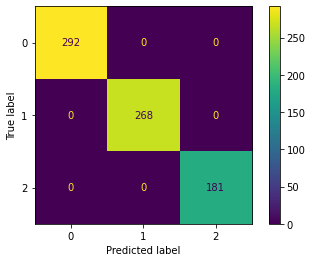

In [109]:
plot_confusion_matrix(RF_model, X_train, y_train )  
plt.show()

In [110]:
#测试集预测效果
test_accuracy = round(RF_model.score(X_test, y_test)*100,2)
print("Testing Accuracy: % {}".format(test_accuracy))

Testing Accuracy: % 100.0


d:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


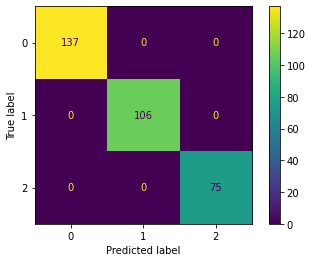

In [112]:
plot_confusion_matrix(RF_model, X_test, y_test )  
plt.show()